# Modeling

## Author: Tilova Shahrin

- [Location Spatial Analysis](#locspatial)
- [Infraction by Location Analysis](#inftime)
- [Time Series Analysis](#time)
- [Holiday](#holiday)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

<a id='locspatial'></a>
## Location Spatial Analysis

We will utilize the location data to analyze spatial patterns of infractions. We can predict different features in different areas based on the location features `latitude` and `longitude`.

In [2]:
parking_df = pd.read_csv('../data/parking_df.csv')
parking_df.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


datetime_of_infraction time_of_infraction  year  month  day  \
0    2016-12-30 16:37:00           16:37:00  2016     12   30   
1    2016-12-30 16:37:00           16:37:00  2016     12   30   
2    2016-12-30 16:37:00           16:37:00  2016     12   30   
3    2016-12-30 16:37:00           16:37:00  2016     12   30   
4    2016-12-30 16:37:00           16:37:00  2016     12   30   

   infraction_code         infraction_description  set_fine_amount  \
0            403.0  STOP-SIGNED HIGHWAY-RUSH HOUR              150   
1            403.0  STOP-SIGNED HIGHWAY-RUSH HOUR              150   
2            403.0  STOP-SIGNED HIGHWAY-RUSH HOUR              150   
3            403.0  STOP-SIGNED HIGHWAY-RUSH HOUR              150   
4            403.0  STOP-SIGNED HIGHWAY-RUSH HOUR              150   

                               location2 province   latitude  longitude  \
0   1546 BLOOR ST W, TORONTO, ON, CANADA       ON  43.656337 -79.453142   
1     5418 YONGE ST, TORONTO, ON, CANADA       ON  43.775587 -79.414671   
2    777 QUEEN ST W, TORONTO, ON, CANADA       ON  43.646259 -79.408080   
3    747 QUEEN ST E, TORONTO, ON, CANADA       ON  43.659131 -79.348080   
4  3042 DUNDAS ST W, TORONTO, ON, CANADA       ON  43.665651 -79.470785   

   permit_time_restrictions  fee_related  time_related  fire_route  \
0                         0            0             0           0   
1                         0            0             0           0   
2                         0            0             0           0   
3                         0            0             0           0   
4                         0            0             0           0   

   accessible_related  commercial_related  obstruction_related  cycle_related  
0                   0                   0                    0              0  
1                   0                   0                    0              0  
2                   0                   0                    0              0  
3                   0                   0                    0              0  
4                   0                   0                    0              0

Let's make sure our dataframe has accurate coorinates, and not the filled 0.0 we did in the preprocessing. 

In [3]:
parking_df[parking_df['latitude'] != 0.0]

datetime_of_infraction time_of_infraction  year  month  day  \
0           2016-12-30 16:37:00           16:37:00  2016     12   30   
1           2016-12-30 16:37:00           16:37:00  2016     12   30   
2           2016-12-30 16:37:00           16:37:00  2016     12   30   
3           2016-12-30 16:37:00           16:37:00  2016     12   30   
4           2016-12-30 16:37:00           16:37:00  2016     12   30   
...                         ...                ...   ...    ...  ...   
12942209    2022-12-12 09:41:00           09:41:00  2022     12   12   
12942217    2022-12-12 09:42:00           09:42:00  2022     12   12   
12942218    2022-12-12 09:42:00           09:42:00  2022     12   12   
12942220    2022-12-12 09:43:00           09:43:00  2022     12   12   
12942230    2022-12-12 09:43:00           09:43:00  2022     12   12   

          infraction_code          infraction_description  set_fine_amount  \
0                   403.0   STOP-SIGNED HIGHWAY-RUSH HOUR              150   
1                   403.0   STOP-SIGNED HIGHWAY-RUSH HOUR              150   
2                   403.0   STOP-SIGNED HIGHWAY-RUSH HOUR              150   
3                   403.0   STOP-SIGNED HIGHWAY-RUSH HOUR              150   
4                   403.0   STOP-SIGNED HIGHWAY-RUSH HOUR              150   
...                   ...                             ...              ...   
12942209              8.0    STAND VEH.-PROHIBIT TIME/DAY              100   
12942217              3.0        PARK ON PRIVATE PROPERTY               30   
12942218            367.0  STND ONSTRT ACCESSIBLE NO PRMT              450   
12942220              3.0        PARK ON PRIVATE PROPERTY               30   
12942230             29.0  PARK PROHIBITED TIME NO PERMIT               30   

                                        location2 province   latitude  \
0            1546 BLOOR ST W, TORONTO, ON, CANADA       ON  43.656337   
1              5418 YONGE ST, TORONTO, ON, CANADA       ON  43.775587   
2             777 QUEEN ST W, TORONTO, ON, CANADA       ON  43.646259   
3             747 QUEEN ST E, TORONTO, ON, CANADA       ON  43.659131   
4           3042 DUNDAS ST W, TORONTO, ON, CANADA       ON  43.665651   
...                                           ...      ...        ...   
12942209       160 FLOYD AVE, TORONTO, ON, CANADA       ON  43.687567   
12942217       20 LOMBARD ST, TORONTO, ON, CANADA       ON  43.651556   
12942218    70 TEMPERANCE ST, TORONTO, ON, CANADA       ON  43.650545   
12942220    2075 BAYVIEW AVE, TORONTO, ON, CANADA       ON  43.721997   
12942230  225 QUEENSDALE AVE, TORONTO, ON, CANADA       ON  43.688542   

          longitude  permit_time_restrictions  fee_related  time_related  \
0        -79.453142                         0            0             0   
1        -79.414671                         0            0             0   
2        -79.408080                         0            0             0   
3        -79.348080                         0            0             0   
4        -79.470785                         0            0             0   
...             ...                       ...          ...           ...   
12942209 -79.348356                         0            0             0   
12942217 -79.376841                         0            0             0   
12942218 -79.382110                         0            0             0   
12942220 -79.372807                         0            0             0   
12942230 -79.322566                         1            0             1   

          fire_route  accessible_related  commercial_related  \
0                  0                   0                   0   
1                  0                   0                   0   
2                  0                   0                   0   
3                  0                   0                   0   
4                  0                   0                   0   
...              ...             

In [4]:
parking_coord = parking_df[parking_df['latitude'] != 0.0]

We have about 1.7 million coordinates compared to the total 12.9 million rows of data. 

Let's plot out all our coordinates and use fine as a targeted variable, to visualize how the data points (coordinates) spread out along the map.

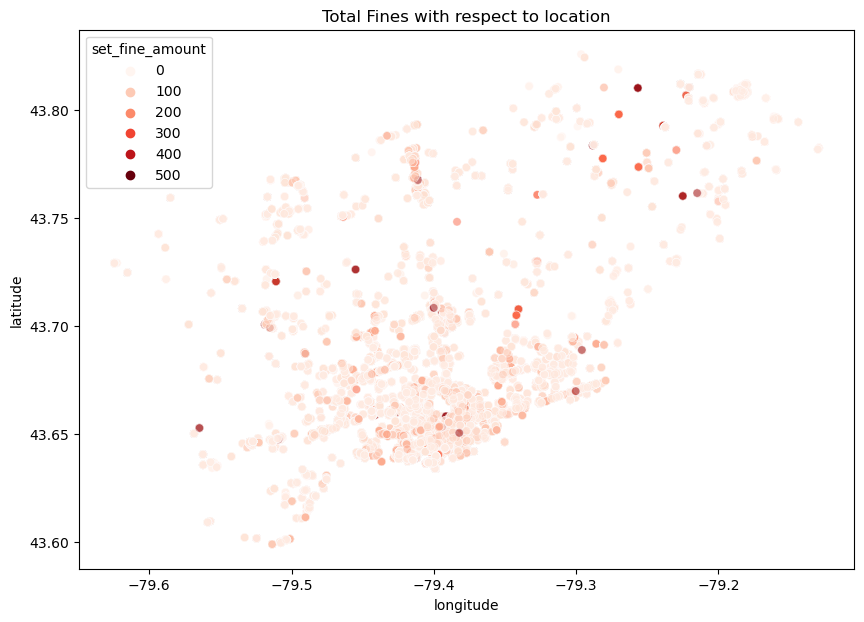

In [5]:
plt.figure(figsize=(10, 7))

sns.scatterplot(data=parking_coord, x="longitude", y="latitude", hue="set_fine_amount", palette="Reds", alpha=0.5)
plt.title("Total Fines with respect to location")
plt.show()

There doesn't seem to be any visual patterns in regards to fines, but we can tell there are many more parking tickets as you get closer to the heart of the city. 

In order to find a relationship between its coordinates and the fines set, we can use K Nearest Neighbors modeling. If fines tend to vary based on their geographical proximity (for example, due to local regulations or demographics), KNN can catch these localized patterns effectively.

Let's start by grabbing the target variables and doing a train test split. 

In [10]:
X = parking_coord[['latitude', 'longitude']]
y = parking_coord['set_fine_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Let's try and predict the fines by using KNeighborsRegressor.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=73)

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Number of neighbours: ", 5)
print("-- R^2 train score: ", train_score)
print("-- R^2 test score: ", test_score)

Number of neighbours:  5
-- R^2 train score:  0.364016756990557
-- R^2 test score:  0.36561902256832113


This shows that approximately 37% of the fines amounts can be accounted for by the features used in this model with 5 neighbors. Let's see if we can get a higher score by checking different n neighbors. I'm going to create a look of neighbors k ranging from 3-100 in 2s. We can get a visual representation after. 

In [15]:
train_scores = []
test_scores = []


for k in range(5, 50, 2):
    model = KNeighborsRegressor(n_neighbors=k)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print("Number of neighbours: ", k)
    print("-- train score: ", train_score)
    print("-- test score: ", test_score)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

Number of neighbours:  5
-- train score:  0.200974126798094
-- test score:  0.20230054969409594
Number of neighbours:  7
-- train score:  0.26540240674585946
-- test score:  0.2673107204727099
Number of neighbours:  9
-- train score:  0.2943406816127586
-- test score:  0.2948540582888838
Number of neighbours:  11
-- train score:  0.3094156203264081
-- test score:  0.31010903325889616
Number of neighbours:  13
-- train score:  0.3194282932328216
-- test score:  0.3204750131695959
Number of neighbours:  15
-- train score:  0.3302786104214813
-- test score:  0.3311331130554692
Number of neighbours:  17
-- train score:  0.330780759562498
-- test score:  0.33141225740243985
Number of neighbours:  19
-- train score:  0.3346259718144521
-- test score:  0.33530530107068335
Number of neighbours:  21
-- train score:  0.3379030515341138
-- test score:  0.33883058960162205
Number of neighbours:  23
-- train score:  0.3436432695596118
-- test score:  0.34493418247181384
Number of neighbours:  25
--

The score definetly increases as the number of neighbours increase, but even if I increase it up to 100 it was still be under a 50% score. 

<a id='inftime'></a>
## Infraction By Location Analysis

I want to predict the type of parking infraction based on location. Using `latitude` and `longitude` as my dependent variables, let's do a decision tree classifier, as there are multiple types of infractions we need to test. Decision trees can effectively capture non-linear relationships between features and the target variable. We will continue using the `parking_coord` dataframe. 

We're going to make a copy of our independent variables before I do the train test split. 

In [6]:
df_numerical_copy = parking_coord[['latitude', 'longitude', 'permit_time_restrictions', 'fee_related', 'time_related', 'fire_route', 'accessible_related', 'commercial_related', 'obstruction_related', 'cycle_related']]

X = df_numerical_copy[['latitude', 'longitude']]
y = df_numerical_copy.drop(columns=['latitude', 'longitude'], axis=1)

y value needs to be a 1d array for the train test split to work. Hence, we need to do one dependent variable at a time. Let's start over and this time, loop over each dependent variable and get a classification report. The classification report helps us assess how well the model performs across different classes, while considering any imbalance. 

In [7]:
infraction_types = ['permit_time_restrictions', 'fee_related', 'time_related', 'fire_route', 
                    'accessible_related', 'commercial_related', 'obstruction_related', 'cycle_related']

for infraction in infraction_types:
    X = df_numerical_copy[['longitude', 'latitude']]
    y = df_numerical_copy[infraction]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalize the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    decision_tree_model = DecisionTreeClassifier()
    decision_tree_model.fit(X_train, y_train)
    
    y_pred = decision_tree_model.predict(X_test)
    y_pred_train = decision_tree_model.predict(X_train)

    print(f"Classification report for {infraction}:")
    print(classification_report(y_test, y_pred))

Evaluating for permit_time_restrictions
              precision    recall  f1-score   support

           0       0.89      0.94      0.92    394117
           1       0.77      0.63      0.69    122482

    accuracy                           0.87    516599
   macro avg       0.83      0.79      0.80    516599
weighted avg       0.86      0.87      0.86    516599

Evaluating for fee_related
              precision    recall  f1-score   support

           0       0.89      0.93      0.91    403495
           1       0.69      0.58      0.63    113104

    accuracy                           0.85    516599
   macro avg       0.79      0.75      0.77    516599
weighted avg       0.84      0.85      0.85    516599

Evaluating for time_related
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    458549
           1       0.77      0.67      0.72     58050

    accuracy                           0.94    516599
   macro avg       0.86      0.82

1. Classification report for permit_time_restrictions: The model demonstrates high precision, recall, and F1-score for both classes, indicating that it performs well in identifying instances of both permit time restrictions violations and non-violations.
2.  Classification report for fee_related: For the class labeled as "1", the F1-score is 0.63. F1-score above 0.5 are considered decent.
3.  Classification report for time_related: For class 1, the recall is 0.42, meaning that only 42% of actual instances of time-related infraction were detected by the model. (Score improved to 0.67 using feature engineering.)
4. Classification report for fire_route: For class 1 (fire_route), the F1-score is 0.25, which is relatively low. This shows that the model's performance in correctly identifying fire routes is not very balanced between precision and recall.
5. Classification report for accessible_related: For class 1, the F1-score is 0.56. The score is moderately good but again depends on class imbalance.
6. Classification report for commercial_related: For the class labeled as 1 (commercial_related), the F1-score is 0.56.
7. For obstruction related,commercial, accesible and cycle related infractions, there is a large imbalance between 0 and 1. 

With these scores, it's important to note that we should consider the context of the problem and the relative importance of precision and recall. In this case, the number of difference offences has a disadvantage in proportion. Let's try to upsample some of these models to improve their scores.

<a id='time'></a>
## Time Series Analysis

Let's explore another model. We're now going to do a time series analysis of the timeline of our parking tickets! The goal is to see if we can predict forecasts of what we can expect based on number of tickets, revenue, etc.

In [8]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

Let's start with some analysis of the time of parking tickets. 

In [9]:
monthly_mean = parking_df.groupby('month')['set_fine_amount'].mean()
monthly_mean

month
1     50.141599
2     50.675796
3     50.454277
4     50.428119
5     50.523346
6     50.399757
7     50.810467
8     50.258792
9     50.102083
10    50.006582
11    50.336409
12    51.111984
Name: set_fine_amount, dtype: float64

Monthly mean for fine shows for every month it's around $50 fine, December having the highest with 51. 

In [10]:
# relative deviation from the overall mean
monthly_mean_diff = (monthly_mean - monthly_mean.mean())/monthly_mean*100

monthly_mean_diff.T

month
1    -0.590000
2     0.470366
3     0.033383
4    -0.018472
5     0.170043
6    -0.074756
7     0.734165
8    -0.355444
9    -0.669337
10   -0.861592
11   -0.200700
12    1.319748
Name: set_fine_amount, dtype: float64

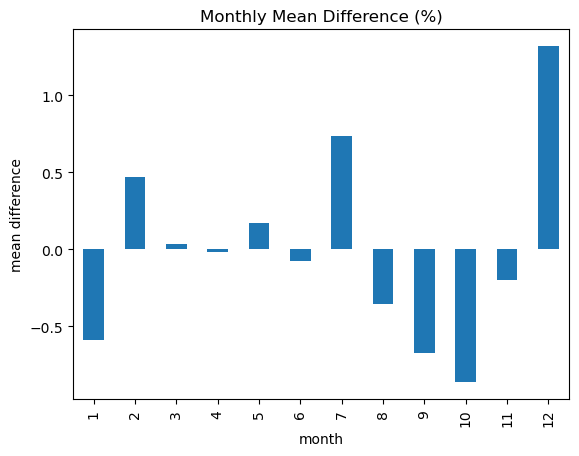

In [34]:
plt.figure()
monthly_mean_diff.plot(kind='bar')
plt.ylabel('mean difference')
plt.title("Monthly Mean Difference (%)")
plt.show()

October has the lowest rate from the average whereas December has the highest. We can tell it goes above average for 4 months whereas it reaches below average significantly for 4-5 months.

To start creating our timeseries of number of parking tickets by day from 2016-2022, we need to set our datetime as our index, to make sure everything is ordered by date. 

In [20]:
parking_df_timeseries = parking_df.copy()

parking_df_timeseries['datetime_of_infraction'] = pd.to_datetime(parking_df_timeseries['datetime_of_infraction'])
parking_df_timeseries.set_index('datetime_of_infraction', inplace=True)

parking_df_timeseries.head()

time_of_infraction  year  month  day  infraction_code  \
datetime_of_infraction                                                         
2016-12-30 16:37:00              16:37:00  2016     12   30            403.0   
2016-12-30 16:37:00              16:37:00  2016     12   30            403.0   
2016-12-30 16:37:00              16:37:00  2016     12   30            403.0   
2016-12-30 16:37:00              16:37:00  2016     12   30            403.0   
2016-12-30 16:37:00              16:37:00  2016     12   30            403.0   

                               infraction_description  set_fine_amount  \
datetime_of_infraction                                                   
2016-12-30 16:37:00     STOP-SIGNED HIGHWAY-RUSH HOUR              150   
2016-12-30 16:37:00     STOP-SIGNED HIGHWAY-RUSH HOUR              150   
2016-12-30 16:37:00     STOP-SIGNED HIGHWAY-RUSH HOUR              150   
2016-12-30 16:37:00     STOP-SIGNED HIGHWAY-RUSH HOUR              150   
2016-12-30 16:37:00     STOP-SIGNED HIGHWAY-RUSH HOUR              150   

                                                    location2 province  \
datetime_of_infraction                                                   
2016-12-30 16:37:00      1546 BLOOR ST W, TORONTO, ON, CANADA       ON   
2016-12-30 16:37:00        5418 YONGE ST, TORONTO, ON, CANADA       ON   
2016-12-30 16:37:00       777 QUEEN ST W, TORONTO, ON, CANADA       ON   
2016-12-30 16:37:00       747 QUEEN ST E, TORONTO, ON, CANADA       ON   
2016-12-30 16:37:00     3042 DUNDAS ST W, TORONTO, ON, CANADA       ON   

                         latitude  longitude  permit_time_restrictions  \
datetime_of_infraction                                                   
2016-12-30 16:37:00     43.656337 -79.453142                         0   
2016-12-30 16:37:00     43.775587 -79.414671                         0   
2016-12-30 16:37:00     43.646259 -79.408080                         0   
2016-12-30 16:37:00     43.659131 -79.348080                         0   
2016-12-30 16:37:00     43.665651 -79.470785                         0   

                        fee_related  time_related  plate_related  fire_route  \
datetime_of_infraction                                                         
2016-12-30 16:37:00               0             1              0           0   
2016-12-30 16:37:00               0             1              0           0   
2016-12-30 16:37:00               0             1              0           0   
2016-12-30 16:37:00               0             1              0           0   
2016-12-30 16:37:00               0             1              0           0   

                        accessible_related  commercial_related  \
datetime_of_infraction                                           
2016-12-30 16:37:00                      0                   0   
2016-12-30 16:37:00                      0                   0   
2016-12-30 16:37:00                      0                   0   
2016-12-30 16:37:00                      0                   0   
2016-12-30 16:37:00                      0                   0   

                        obstruction_related  cycle_related  
datetime_of_infraction                                      
2016-12-30 16:37:00                       0              0  
2016-12-30 16:37:00                       0              0  
2016-12-30 16:37:00                       0              0  
2016-12-30 16:37:00                       0              0  
2016-12-30 16:37:00                       0              0

In [21]:
parking_df_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12942258 entries, 2016-12-30 16:37:00 to 2022-12-12 09:47:00
Data columns (total 20 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   time_of_infraction        object 
 1   year                      int64  
 2   month                     int64  
 3   day                       int64  
 4   infraction_code           float64
 5   infraction_description    object 
 6   set_fine_amount           int64  
 7   location2                 object 
 8   province                  object 
 9   latitude                  float64
 10  longitude                 float64
 11  permit_time_restrictions  int64  
 12  fee_related               int64  
 13  time_related              int64  
 14  plate_related             int64  
 15  fire_route                int64  
 16  accessible_related        int64  
 17  commercial_related        int64  
 18  obstruction_related       int64  
 19  cycle_related             int

Now let's group the number of tickets given by day, and visualize.

In [28]:
parking_df['datetime_of_infraction'] = pd.to_datetime(parking_df['datetime_of_infraction'])

tickets_df = parking_df.copy()
tickets_df['date'] = parking_df['datetime_of_infraction'].dt.date

# Group the data by date and count the number of tickets for each date
tickets_by_day = tickets_df.groupby('date').size()

tickets_by_day

date
2016-01-01    1572
2016-01-02    5228
2016-01-03    4756
2016-01-04    5879
2016-01-05    6610
              ... 
2022-12-27    2107
2022-12-28    4410
2022-12-29    4432
2022-12-30    4599
2022-12-31    2841
Length: 2557, dtype: int64

Checking the dates that had the highest number of tickets. 

In [12]:
tickets_df['year'] = parking_df['datetime_of_infraction'].dt.year

tickets_by_year_day = tickets_df.groupby(['year', 'date']).size()

tickets_by_year_day.groupby('year').idxmax()

year
2016    (2016, 2016-04-01)
2017    (2017, 2017-06-01)
2018    (2018, 2018-10-16)
2019    (2019, 2019-12-10)
2020    (2020, 2020-03-04)
2021    (2021, 2021-11-03)
2022    (2022, 2022-04-05)
dtype: object

And now the lowest. 

In [13]:
tickets_by_year_day.groupby('year').idxmin()

year
2016    (2016, 2016-12-25)
2017    (2017, 2017-12-25)
2018    (2018, 2018-12-25)
2019    (2019, 2019-12-25)
2020    (2020, 2020-04-10)
2021    (2021, 2021-12-25)
2022    (2022, 2022-01-17)
dtype: object

Christmas is a significant date with the lowest number of tickets for 5 of the 7 years. 

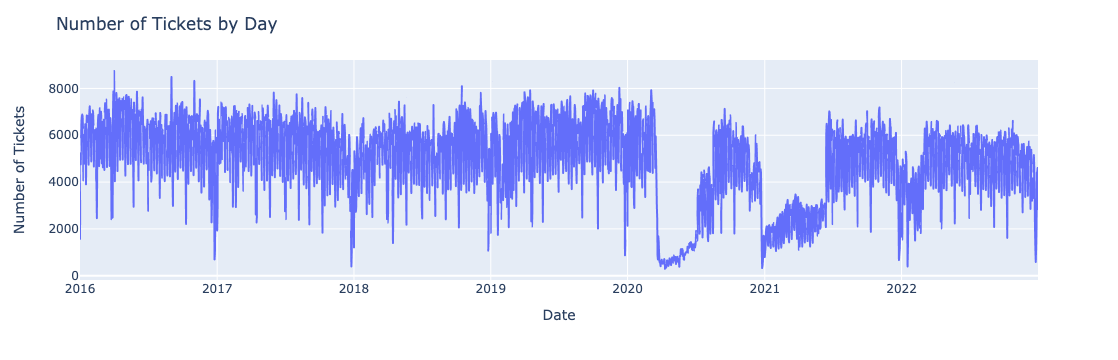

In [23]:
fig = px.line(x=tickets_by_day.index, y=tickets_by_day.values, labels={'x': 'Date', 'y': 'Number of Tickets'})
fig.update_layout(title='Number of Tickets by Day', xaxis_title='Date', yaxis_title='Number of Tickets')
fig.show()

We can see multiple patterns here. 
1. The peak during spring time and fall every year. March-June and October-November. 
2. The yearly drop around christmas time, probably since everyone is at home. 
3. The massive drop in March 2020 because of COVID-19. Before tickets inscreasing it goes down again in Jan 2021, possibly indicating another COVID wave. 

### Forecasting Model

Let's use a forecasting model to predict the next year's forecast based on frequency of tickets by day. ARIMA and Prophet are commonly used for time series forecasting tasks. Let's use prophet for our model as it has a stronger performance.

We'll use the first and last year as our train and test data.

13:31:45 - cmdstanpy - INFO - Chain [1] start processing
13:31:45 - cmdstanpy - INFO - Chain [1] done processing


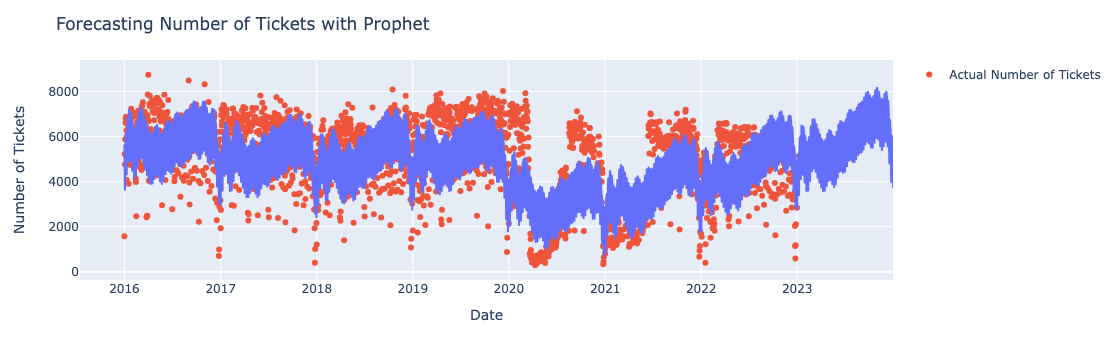

In [33]:
from prophet import Prophet

tickets_prophet = tickets_by_day.reset_index()
tickets_prophet.columns = ['ds', 'y'] 

#the last 365 rows of data (2022)
test_data = tickets_prophet.iloc[-365:]
train_data = tickets_prophet.iloc[:-365]

model = Prophet()
model.fit(train_data)

future = model.make_future_dataframe(periods=730)
forecast = model.predict(future)

#comparing real data with predicted data
fig = px.line(forecast, x='ds', y='yhat', labels={'ds': 'Date', 'yhat': 'Predicted Number of Tickets'})
fig.add_scatter(x=tickets_prophet['ds'], y=tickets_prophet['y'], mode='markers', name='Actual Number of Tickets')

fig.update_layout(title='Forecasting Number of Tickets with Prophet',
                  xaxis_title='Date', yaxis_title='Number of Tickets')
fig.show()


We can see an easy predictive pattern for each year, where it spikes up in March and October, but then drops in December. 

Let's use an interactive plot so we don't need to zoom each time. This can be done using `plot_components_plotly`.

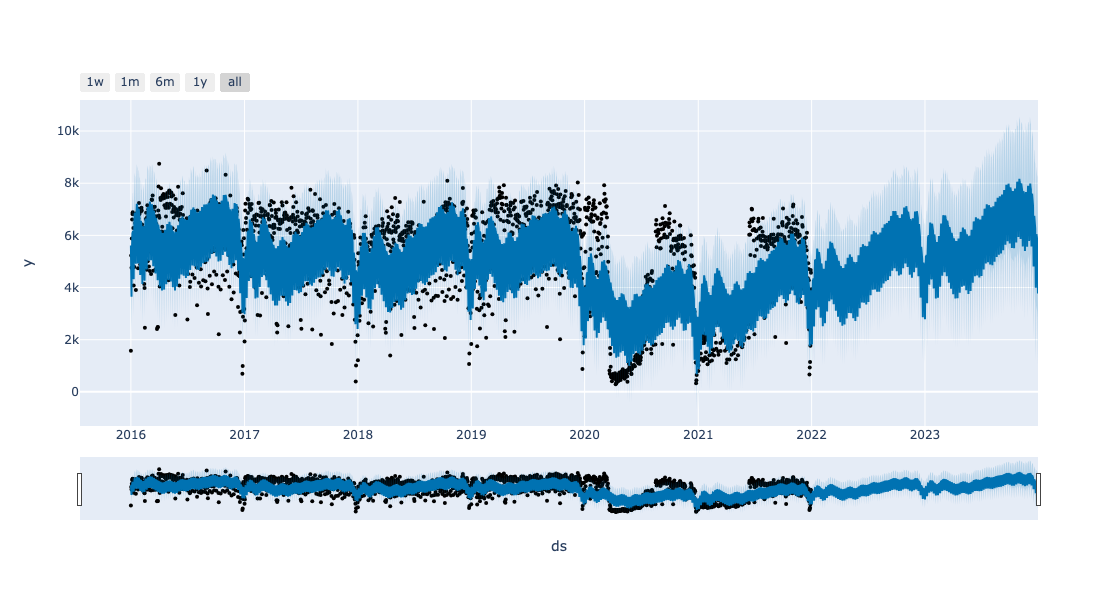

In [30]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

To see the forcast components, I will use the `plot_components` method. This will show me trends and patterns within day of the week or yearly. 

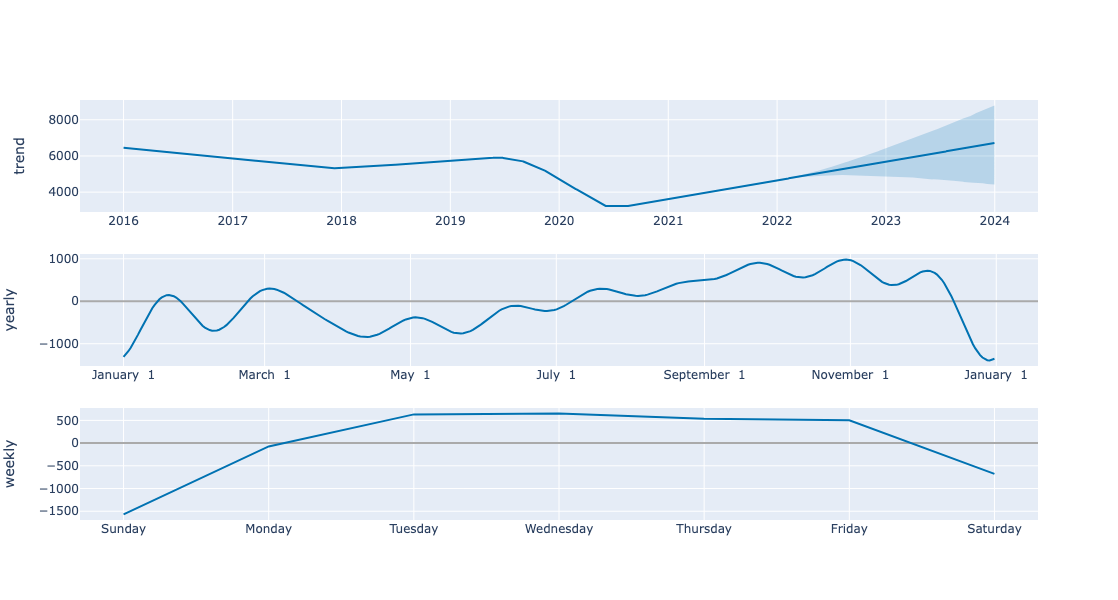

In [31]:
plot_components_plotly(model, forecast)

Our yearly observations were correct. The trend showing us the predictive trends as well as the increase in number of tickets since COVID. 

Let's score this model. 

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

actual_values = test_data['y'].values
predicted_values = forecast.iloc[-365:]['yhat'].values

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 1581.323657167123
Mean Squared Error: 3811387.587002941
Root Mean Squared Error: 1952.277538415822


These scores are not good. We may not be able to use this model. 

In [104]:
from prophet.diagnostics import cross_validation

# Perform cross-validation
cv_results = cross_validation(model, initial='365 days', period='180 days', horizon='365 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/9 [00:00<?, ?it/s]

17:38:14 - cmdstanpy - INFO - Chain [1] start processing
17:38:15 - cmdstanpy - INFO - Chain [1] done processing
17:38:15 - cmdstanpy - INFO - Chain [1] start processing
17:38:15 - cmdstanpy - INFO - Chain [1] done processing
17:38:15 - cmdstanpy - INFO - Chain [1] start processing
17:38:15 - cmdstanpy - INFO - Chain [1] done processing
17:38:15 - cmdstanpy - INFO - Chain [1] start processing
17:38:16 - cmdstanpy - INFO - Chain [1] done processing
17:38:16 - cmdstanpy - INFO - Chain [1] start processing
17:38:16 - cmdstanpy - INFO - Chain [1] done processing
17:38:16 - cmdstanpy - INFO - Chain [1] start processing
17:38:16 - cmdstanpy - INFO - Chain [1] done processing
17:38:17 - cmdstanpy - INFO - Chain [1] start processing
17:38:17 - cmdstanpy - INFO - Chain [1] done processing
17:38:17 - cmdstanpy - INFO - Chain [1] start processing
17:38:17 - cmdstanpy - INFO - Chain [1] done processing
17:38:17 - cmdstanpy - INFO - Chain [1] start processing
17:38:18 - cmdstanpy - INFO - Chain [1]

In [105]:
cv_results.columns

Index(['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'y', 'cutoff'], dtype='object')

CV_Result columns:
- `ds`: These are the dates for when the prediction happened. 
- `yhat`: These are the predicted values generated by the model.
- `yhat_lower`: This is the lower bound of the predicted values, representing the lower bound of a confidence interval.
- `yhat_upper`: This is the upper bound of the predicted values, representing the upper bound of a confidence interval.
- `y`: These are the observed values for the corresponding dates.
- `cutoff`: This column indicates the cutoff date used during the cross-validation process. 

In [106]:
cv_results.head()

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0 2017-01-22  4891.050617  3834.882863  5933.168046  4431 2017-01-21
1 2017-01-23  6358.875740  5349.301760  7324.855480  7009 2017-01-21
2 2017-01-24  7153.080278  6147.508313  8076.451368  7199 2017-01-21
3 2017-01-25  7168.679848  6132.081434  8182.095193  6433 2017-01-21
4 2017-01-26  7013.018401  5995.242927  8098.370256  6454 2017-01-21

In [107]:
from prophet.diagnostics import performance_metrics

performance = performance_metrics(cv_results, rolling_window=1)

performance

horizon           mse       rmse          mae      mape     mdape  \
0 365 days  6.770779e+06  2602.0721  1777.382579  0.914128  0.181458   

      smape  coverage  
0  0.506814  0.538204

In [101]:
cv_mae = mean_absolute_error(cv_results['y'], cv_results['yhat'])
cv_mse = mean_squared_error(cv_results['y'], cv_results['yhat'])
cv_rmse = np.sqrt(cv_mse)

print("Cross-Validation Mean Absolute Error (MAE):", cv_mae)
print("Cross-Validation Mean Squared Error (MSE):", cv_mse)
print("Cross-Validation Root Mean Squared Error (RMSE):", cv_rmse)


Cross-Validation Mean Absolute Error (MAE): 1777.382579401566
Cross-Validation Mean Squared Error (MSE): 6770779.2135649705
Cross-Validation Root Mean Squared Error (RMSE): 2602.0720999935743


<a id='holiday'></a>
### Holidays

Let's see if there's any patterns for holidays by creating a dictionary of holidays and their dates. These are considered Ontario Holidays. 

In [35]:
holidays = {
    'New Year': '2022-01-01', 
    'Independence Day': '2022-07-04', 
    'Thanksgiving': '2022-11-28',
    'Family Day': '2022-02-19',
    'Easter Monday': '2022-04-01',
    'Victoria Day': '2022-05-20',
    'Canada Day': '2022-07-01',
    'Civic Day': '2022-08-05',
    'Labour Day': '2022-09-02',
    'Christmas Day': '2022-12-25',
    'Boxing Day': '2022-12-26',
}

Let's have this filtered for 2022 only. Check the number of tickets issued during those days. From what we know, Christmas has the lowest, so does this apply for all holidays?

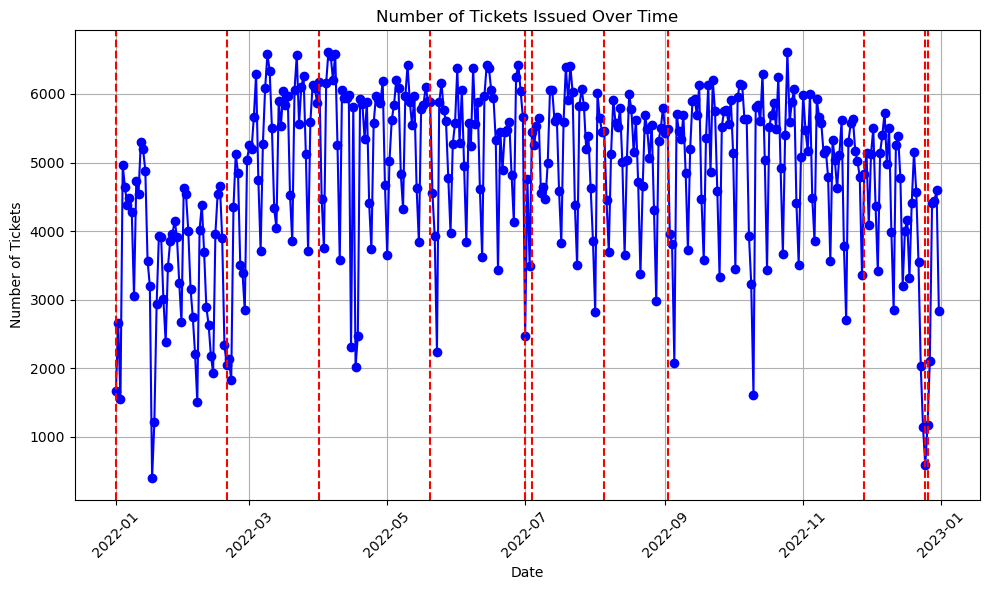

In [80]:
parking_df['datetime_of_infraction'] = pd.to_datetime(parking_df['datetime_of_infraction'])

parking_df['year'] = parking_df['datetime_of_infraction'].dt.year

tickets_df = parking_df[parking_df['year'] == 2022]

tickets_by_day = tickets_df.groupby(tickets_df['datetime_of_infraction'].dt.date).size()

plt.figure(figsize=(10, 6))
plt.plot(tickets_by_day.index, tickets_by_day.values, color='blue', marker='o', linestyle='-')
plt.title('Number of Tickets Issued Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.grid(True)

for holiday, date in holidays.items():
    holiday_date = pd.to_datetime(date)
    plt.axvline(holiday_date, color='red', linestyle='--', label=holiday)

plt.tight_layout()
plt.show()

From this plot, it seems majority of the holidays have relatively low number of tickets issues except for Victoria Day and Labour Day. 

### Output the number of tickets for each holiday in 2022

In [86]:
for holiday, date in holidays.items():
    holiday_date = pd.to_datetime(date).date()
    if holiday_date in tickets_by_day.index:
        print(f"{holiday}: {tickets_by_day[holiday_date]} tickets")

New Year: 1669 tickets
Independence Day: 5443 tickets
Thanksgiving: 4828 tickets
Family Day: 2052 tickets
Easter Monday: 6168 tickets
Victoria Day: 5883 tickets
Canada Day: 2468 tickets
Civic Day: 5456 tickets
Labour Day: 5484 tickets
Christmas Day: 587 tickets
Boxing Day: 1170 tickets


### References

- ZerotoMastery: https://zerotomastery.io/blog/time-series-forecasting-with-facebook-prophet/#:~:text=Cross%2Dvalidation%20is%20an%20important,on%20the%20corresponding%20testing%20set.
- Prophet: https://facebook.github.io/prophet/docs/diagnostics.html
- Prophet forecast: https://facebook.github.io/prophet/docs/saturating_forecasts.html#forecasting-growth